**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Classification

In [3]:

C_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Final-Project-Isabella/main/data/Processed_Data/Classification_Train%20(2).csv", index_col="Unnamed: 0")
C_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Final-Project-Isabella/main/data/Processed_Data/Classification_Test%20(2).csv",index_col="Unnamed: 0")

In [4]:
C_train.isna().sum()

congested          0
theta_past_ma10    1
dtype: int64

## Drop nan for classification Data

In [5]:
C_train =C_train.dropna()

In [6]:
C_train.head()

,congested,theta_past_ma10
1,1,15273399.0
2,1,17471551.5
3,1,22149202.0
4,1,26983453.0


In [7]:
C_test.isna().sum()

congested          0
theta_past_ma10    0
dtype: int64

## import train and test data for Regression

In [8]:

R_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Final-Project-Isabella/main/data/Processed_Data/Regression_Train%20(1).csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Final-Project-Isabella/main/data/Processed_Data/Regression_Test%20(1).csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [9]:
R_train.isna().sum()

theta              0
theta_past_ma10    1
dtype: int64

In [10]:
R_train=R_train.dropna()

In [11]:
R_test.isna().sum()

theta              0
theta_past_ma10    0
dtype: int64

In [12]:
R_train.head()

,theta,theta_past_ma10
1,19669704,15273399.0
2,24628700,17471551.5
3,29338206,22149202.0
4,34637650,26983453.0


In [13]:
R_test.head()

,theta,theta_past_ma10
5,36206000,31987928.0
6,42890481,35421825.0


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [14]:
C_train.head()

,congested,theta_past_ma10
1,1,15273399.0
2,1,17471551.5
3,1,22149202.0
4,1,26983453.0


In [15]:
X_train = pd.DataFrame(np.array(C_train['theta_past_ma10']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['congested'].astype(int))

In [16]:
C_test.head()

,congested,theta_past_ma10
5,1,31987928.0
6,1,35421825.0


In [17]:
X_test = pd.DataFrame(np.array(C_test['theta_past_ma10']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['congested'].astype(int))

## Import base packages

In [18]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Decision Tree Classifer

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

## Result

In [21]:
y_pred= mdl.predict(X_test)
y_pred

array([1, 1])

## Evaluations

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


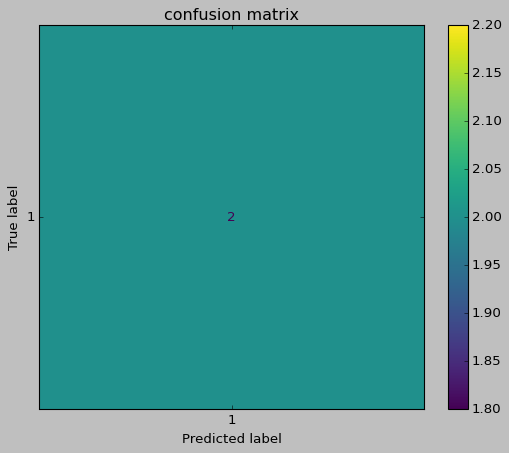

In [23]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

In [24]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


IndexError: ignored

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
mdl = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-26-037da15b76a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [27]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


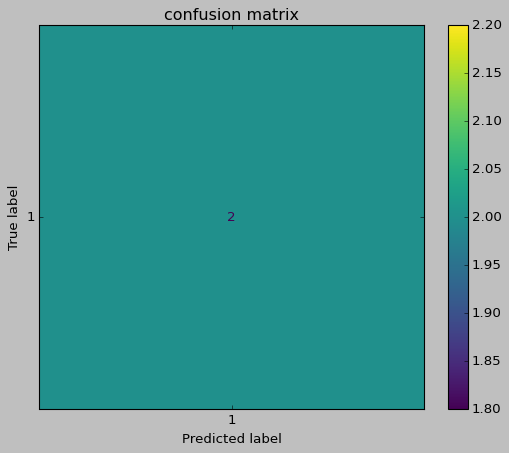

In [28]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

In [29]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


IndexError: ignored

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


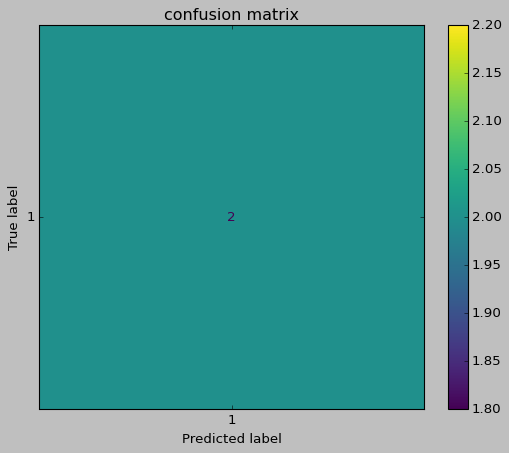

In [33]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

## Auto-ML Classifier

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [34]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [36]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [75]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [84]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/classifier/"
AutoGluon Version:  0.6.0
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    4
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (34637650, 19669704, 27068565.0, 6406725.71916)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11354.89 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0% of available memory)
	Inferring data

In [89]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")
print(predictor.problem_type)

regression


In [92]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=['r2', 'root_mean_squared_error'])

#['accuracy', 'precision','recall','acc','f1']) These parameters did not work with the problem_type regression. I queried other parameters that help us to understand predictive accuracy

,model,score_test,r2,root_mean_squared_error,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,-1.528932e+07,-19.926705,-1.528932e+07,-7.821717e+06,0.002382,0.001374,5.106724,0.002382,0.001374,5.106724,1,True,4
1,WeightedEnsemble_L2,-1.528932e+07,-19.926705,-1.528932e+07,-7.821717e+06,0.004077,0.001752,5.323479,0.001695,0.000378,0.216755,2,True,9
2,XGBoost,-1.528934e+07,-19.926764,-1.528934e+07,-7.821738e+06,0.012009,0.004021,0.105553,0.012009,0.004021,0.105553,1,True,7
3,RandomForestMSE,-1.664702e+07,-23.808341,-1.664702e+07,-9.140245e+06,0.054496,0.058740,0.409319,0.054496,0.058740,0.409319,1,True,3
4,ExtraTreesMSE,-1.664702e+07,-23.808341,-1.664702e+07,-9.140245e+06,0.055860,0.051843,0.387923,0.055860,0.051843,0.387923,1,True,5
5,LightGBM,-1.771714e+07,-27.100363,-1.771714e+07,-1.018929e+07,0.001696,0.001704,0.152704,0.001696,0.001704,0.152704,1,True,2
6,LightGBMXT,-1.771714e+07,-27.100363,-1.771714e+07,-1.018929e+07,0.002544,0.002738,0.166374,0.002544,0.002738,0.166374,1,True,1
7,LightGBMLarge,-1.771714e+07,-27.100363,-1.771714e+07,-1.018929e+07,0.015460,0.001942,0.155292,0.015460,0.001942,0.155292,1,True,8
8,NeuralNetFastAI,-1.846351e+07,-29.517787,-1.846351e+07,-1.044082e+07,0.012229,0.006843,0.149961,0.012229,0.006843,0.149961,1,True,6


# Machine Learning Regression

## important global packages

In [41]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [42]:
R_train.head()

,theta,theta_past_ma10
1,19669704,15273399.0
2,24628700,17471551.5
3,29338206,22149202.0
4,34637650,26983453.0


In [43]:
X_train = pd.DataFrame(R_train['theta_past_ma10'])
y_train = pd.DataFrame(R_train['theta'])

In [44]:
R_test.head()

,theta,theta_past_ma10
5,36206000,31987928.0
6,42890481,35421825.0


In [45]:
X_test = pd.DataFrame(R_test['theta_past_ma10'])
y_test = pd.DataFrame(R_test['theta'])

## Linear Regression

In [46]:
from sklearn import linear_model

In [47]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [48]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.3194902221138882


In [49]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,4.108768e+07
1,4.526705e+07


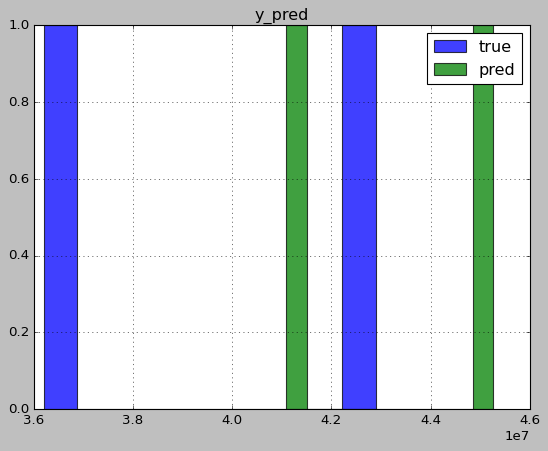

In [50]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-52-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [53]:
# calculate R2
from sklearn.metrics import r2_score

In [54]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -4.093181409868626


In [55]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,32786349.06
1,32786349.06


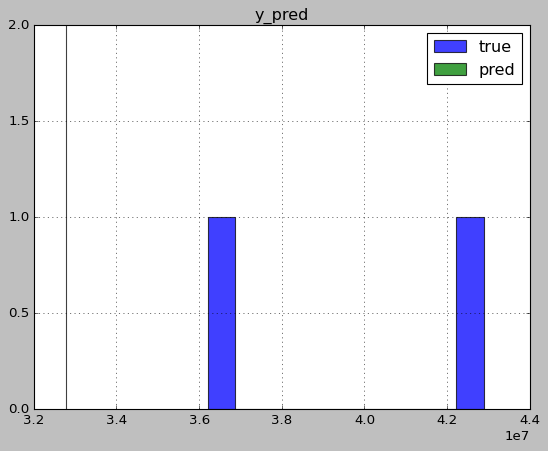

In [56]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Auto-ML

In [57]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [58]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [59]:
predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.6.0
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    4
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (34637650, 19669704, 27068565.0, 6406725.71916)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12258.64 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0% of available memory)
	Inferring data

In [60]:
predictor = TabularPredictor.load("AutogluonModels/regression/")

In [61]:
r2 = r2_score(y_test,
              predictor.predict(
                  X_test)
              )
print(f'R2 Score: {r2}')

R2 Score: -19.92670540972064


In [62]:
y_pred = predictor.predict(X_test)
y_pred

5    24628700.0
6    24628700.0
Name: target, dtype: float32

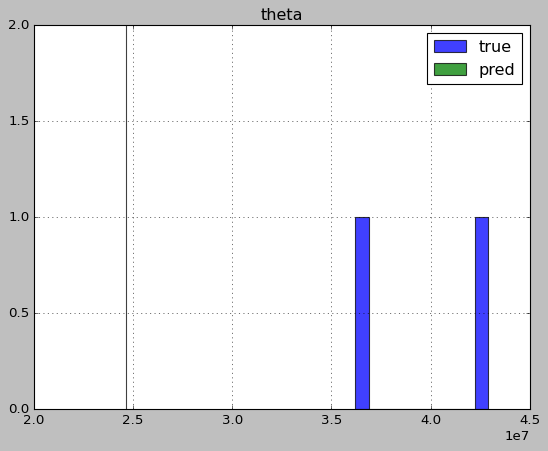

In [63]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


In [64]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,-1.528932e+07,-1.528932e+07,-2.337633e+14,-14919540.5,-14919540.5,-19.926705,-7.821717e+06,0.001899,0.001418,12.168200,0.001899,0.001418,12.168200,1,True,4
1,WeightedEnsemble_L2,-1.528932e+07,-1.528932e+07,-2.337633e+14,-14919540.5,-14919540.5,-19.926705,-7.821717e+06,0.003609,0.001791,12.404613,0.001710,0.000373,0.236412,2,True,9
2,XGBoost,-1.528934e+07,-1.528934e+07,-2.337639e+14,-14919562.5,-14919562.5,-19.926764,-7.821738e+06,0.010907,0.004185,0.106325,0.010907,0.004185,0.106325,1,True,7
3,ExtraTreesMSE,-1.664702e+07,-1.664702e+07,-2.771233e+14,-16308058.5,-16308058.5,-23.808341,-9.140245e+06,0.056483,0.053208,0.384753,0.056483,0.053208,0.384753,1,True,5
4,RandomForestMSE,-1.664702e+07,-1.664702e+07,-2.771233e+14,-16308058.5,-16308058.5,-23.808341,-9.140245e+06,0.065191,0.042787,0.738579,0.065191,0.042787,0.738579,1,True,3
5,LightGBM,-1.771714e+07,-1.771714e+07,-3.138971e+14,-17399038.5,-17399038.5,-27.100363,-1.018929e+07,0.002326,0.008797,0.238368,0.002326,0.008797,0.238368,1,True,2
6,LightGBMXT,-1.771714e+07,-1.771714e+07,-3.138971e+14,-17399038.5,-17399038.5,-27.100363,-1.018929e+07,0.003188,0.041260,0.319105,0.003188,0.041260,0.319105,1,True,1
7,LightGBMLarge,-1.771714e+07,-1.771714e+07,-3.138971e+14,-17399038.5,-17399038.5,-27.100363,-1.018929e+07,0.016420,0.001621,0.146715,0.016420,0.001621,0.146715,1,True,8
8,NeuralNetFastAI,-1.846351e+07,-1.846351e+07,-3.409011e+14,-18140303.5,-18140303.5,-29.517787,-1.044082e+07,0.014963,0.006889,0.168461,0.014963,0.006889,0.168461,1,True,6


## Add Your Own Analysis

In [65]:
##Stochastic Gradient Descent for Regression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [66]:
mdl = linear_model.SGDRegressor().fit(X=X_train, y=y_train, coef_init=None, intercept_init=None, sample_weight=None)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

R2 Score: -2.283064053935904e+33


In [68]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,1.646934e+23
1,1.545391e+23


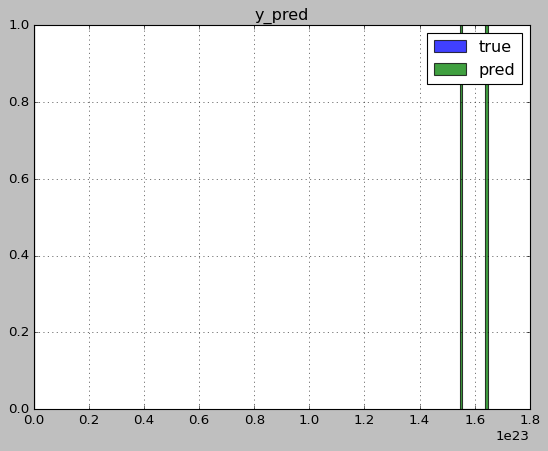

In [69]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()